In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
plt.style.use('seaborn-poster')
%matplotlib inline

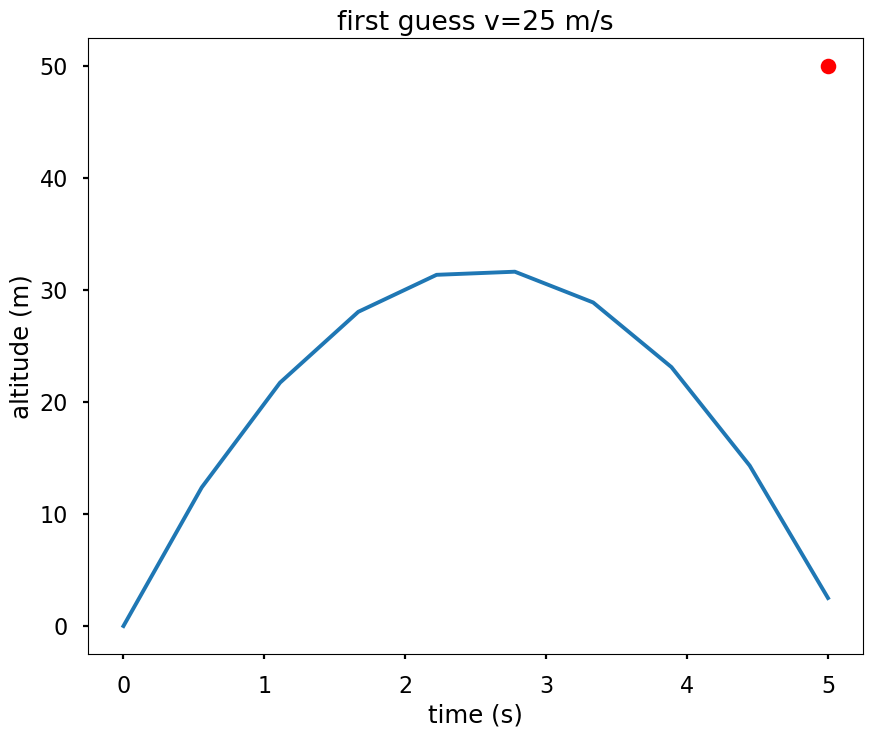

In [2]:
F = lambda t, s: \
  np.dot(np.array([[0,1],[0,-9.8/s[1]]]),s)

t_span = np.linspace(0, 5, 100)
y0 = 0
v0 = 25
t_eval = np.linspace(0, 5, 10)
sol = solve_ivp(F, [0, 5], \
                [y0, v0], t_eval = t_eval)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'first guess v={v0} m/s')
plt.show()

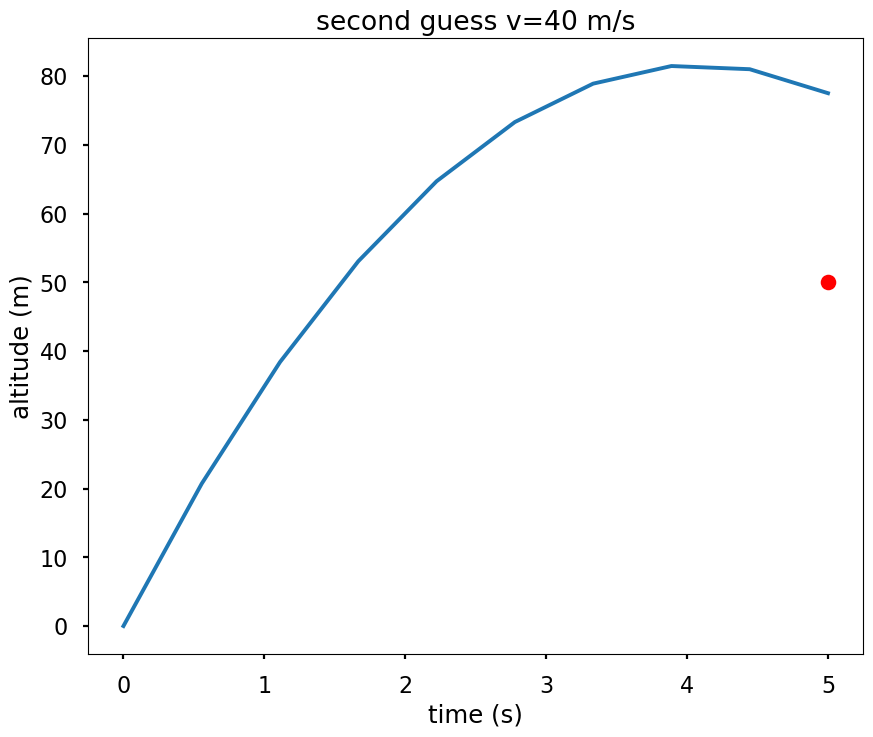

In [3]:
v0 = 40
sol = solve_ivp(F, [0, 5], \
            [y0, v0], t_eval = t_eval)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'second guess v={v0} m/s')
plt.show()

In [4]:
from scipy.optimize import fsolve

def objective(v0):
    sol = solve_ivp(F, [0, 5], \
            [y0, v0], t_eval = t_eval)
    y = sol.y[0]
    return y[-1] - 50

v0, = fsolve(objective, 10)
print(v0)

34.49999999999999


C:\Users\629078\Anaconda3\lib\site-packages\scipy\integrate\_ivp\base.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y0 = np.asarray(y0)


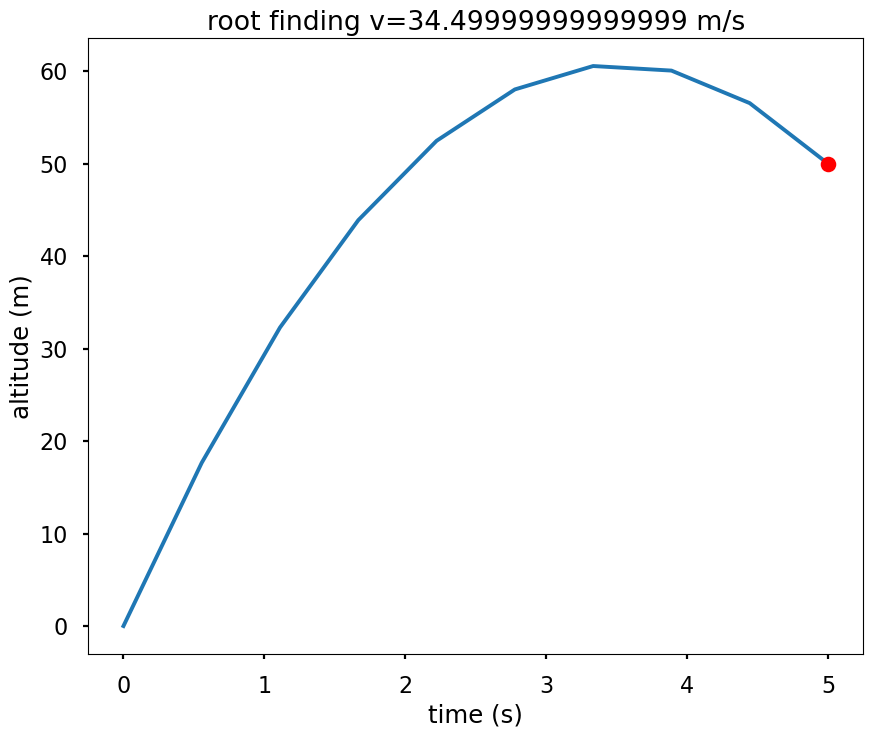

In [5]:
sol = solve_ivp(F, [0, 5], \
            [y0, v0], t_eval = t_eval)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'root finding v={v0} m/s')
plt.show()

In [6]:
for v0_guess in range(1, 100, 10):
    v0, = fsolve(objective, v0_guess)
    print('Init: %d, Result: %.1f' \
          %(v0_guess, v0))

Init: 1, Result: 34.5
Init: 11, Result: 34.5
Init: 21, Result: 34.5
Init: 31, Result: 34.5
Init: 41, Result: 34.5
Init: 51, Result: 34.5
Init: 61, Result: 34.5
Init: 71, Result: 34.5
Init: 81, Result: 34.5
Init: 91, Result: 34.5
